In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
import datetime
#sns.set(color_codes=True)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import statistics as st
sns.set_style('whitegrid', {'axes.linewidth' : 0.5})
from statsmodels.distributions.empirical_distribution import ECDF
import scipy
import gc
import re
import shapely
import geopandas as gpd

In [41]:
covid_regions = gpd.read_file('./data/covid_regions.dbf').to_crs('epsg:3395').to_crs('epsg:4326')

In [79]:
test_sites = pd.read_csv('~/Box/covid_CDPH/ss_test_site_lat_longs_short.csv', encoding= 'unicode_escape')

In [71]:
test_sites = gpd.GeoDataFrame(test_sites, geometry=gpd.points_from_xy(test_sites.Long, test_sites.Lat))

In [80]:
test_sites

,site_name,Lat,Long
0,Dr. Jorge Prieto Math and Science Academy,41.921075,-87.765227
1,Maria Saucedo Scholastic Academy,41.848628,-87.697806
2,Gately Park,41.708100,-87.605478
3,Charles A. Prosser Career Academy,41.919349,-87.761909
4,Midway Airport Parking Lot B,41.792577,-87.766230
5,Northwest Side Housing Center,41.931220,-87.757971
6,St. Stanislaus Bishop and Martyr Catholic Church,41.922557,-87.760339
7,Douglass Park,41.856151,-87.699314
8,Auburn Gresham,41.751997,-87.628487
9,Harwood Heights,41.958453,-87.796855


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


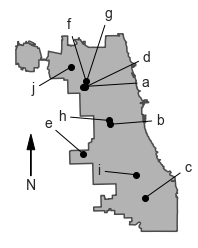

In [121]:
#fig = plt.figure(figsize=(4,4))
covid_regions[10:11].plot(linewidth=1.5, edgecolor='0.3', color='#b3b3b3')
ax = plt.gca()
plt.arrow(x=-87.9, y=41.75, dx=0.0, dy=0.05, color='k', head_width=0.02)
plt.text(s='N', x=-87.9, y=41.745, va='top', ha='center', fontsize=14)
alpha = 'abcdefghijklmnop' #'ABCDEFGHIJKLMNOP'
x_adjust = [0.15,0.12,0.1,0.15,-0.1,-0.05,0.05,-0.13,-0.1,-0.10,-0.05]
y_adjust = [0,0,0.05,0.05,0.05,0.1,0.13,0,0,-0.05,0.05]
for index, row in test_sites.iterrows():
    x = row['Long']
    y = row['Lat']
    x_text = x + x_adjust[index]
    y_text = y + y_adjust[index]
    plt.annotate(s=alpha[index], xy=(x,y), xytext=(x_text,y_text), fontsize=14, arrowprops={'arrowstyle':'-', 'color':'k'})
    plt.scatter(row['Long'], row['Lat'], color='k')
ax.axis('off')
plt.savefig('fig_1_panel_a_210729.png', dpi=200, bbox_inches='tight')
plt.savefig('fig_1_panel_a_210729.pdf', bbox_inches='tight')

In [76]:
test_sites[test_sites['site_name'].isin(['Dr. Jorge Prieto Math and Science Academy','Maria Saucedo Scholastic Academy', 
        'Gately Park','Charles A. Prosser Career Academy', 'Midway Airpot Parking Lot B', 
        'Northwest Side Housing Center', 'St. Stanislaus Bishop and Martyr Catholic Church', 'Douglass Park', 'Auburn Gresham' , 'Harwood Heights'])]

,site_name,Lat,Long,geometry
2,Maria Saucedo Scholastic Academy,41.848628,-87.697806,POINT (-87.69781 41.84863)
3,Dr. Jorge Prieto Math and Science Academy,41.921075,-87.765227,POINT (-87.76523 41.92107)
4,Charles A. Prosser Career Academy,41.919349,-87.761909,POINT (-87.76191 41.91935)
5,Gately Park,41.708100,-87.605478,POINT (-87.60548 41.70810)
7,Douglass Park,41.856151,-87.699314,POINT (-87.69931 41.85615)
10,Harwood Heights,41.958453,-87.796855,POINT (-87.79686 41.95845)


,site_name,Lat,Long,geometry
0,Kennedy King,41.779629,-87.644672,POINT (-87.64467 41.77963)
1,Guaranteed Rate,41.831811,-87.638942,POINT (-87.63894 41.83181)
2,Maria Saucedo Scholastic Academy,41.848628,-87.697806,POINT (-87.69781 41.84863)
3,Dr. Jorge Prieto Math and Science Academy,41.921075,-87.765227,POINT (-87.76523 41.92107)
4,Charles A. Prosser Career Academy,41.919349,-87.761909,POINT (-87.76191 41.91935)
5,Gately Park,41.708100,-87.605478,POINT (-87.60548 41.70810)
6,Horizon Science Academy  Southwest,41.795116,-87.684182,POINT (-87.68418 41.79512)
7,Douglass Park,41.856151,-87.699314,POINT (-87.69931 41.85615)
8,Midway Airport Parking Lot B,41.792577,-87.766230,POINT (-87.76623 41.79258)
9,Columbus Park,41.876290,-87.768925,POINT (-87.76892 41.87629)
